In [97]:
import nltk

In [98]:
import os

In [99]:
os.getcwd()

'C:\\Users\\lenovo'

In [100]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [101]:
data = pd.read_csv("train.csv")

In [102]:
data

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [103]:
# extracting the number of examples of each class
EAP_len = data[data['author'] == 'EAP'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]
EAP_len,HPL_len,MWS_len

(7900, 5635, 6044)

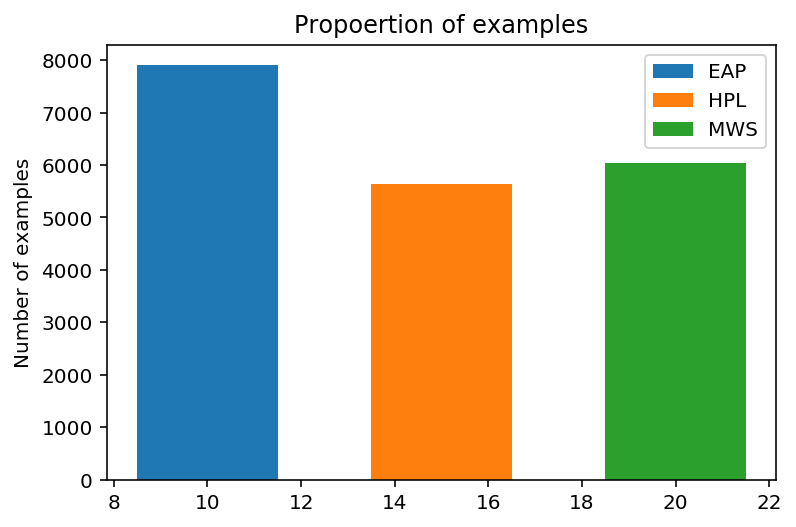

In [104]:
plt.bar(10,EAP_len,3, label="EAP")
plt.bar(15,HPL_len,3, label="HPL")
plt.bar(20,MWS_len,3, label="MWS")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propoertion of examples')
plt.show()

In [105]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [106]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [107]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [108]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [109]:
#Function to remove stopwords

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [110]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


In [111]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

In [112]:
dictionary

dict_items([('process', 17284), ('however', 10865), ('afforded', 455), ('means', 13823), ('ascertaining', 1301), ('dimensions', 6188), ('dungeon', 6957), ('might', 14060), ('make', 13510), ('circuit', 3762), ('return', 18738), ('point', 16780), ('whence', 24685), ('set', 19861), ('without', 24918), ('aware', 1654), ('fact', 8295), ('perfectly', 16214), ('uniform', 23486), ('seemed', 19713), ('wall', 24428), ('never', 14862), ('occurred', 15251), ('fumbling', 9339), ('mere', 13966), ('mistake', 14207), ('left', 12862), ('hand', 10227), ('gold', 9816), ('snuff', 20538), ('box', 2602), ('capered', 3141), ('hill', 10639), ('cutting', 5297), ('manner', 13591), ('fantastic', 8401), ('steps', 21142), ('took', 22617), ('incessantly', 11358), ('air', 555), ('greatest', 9965), ('possible', 16935), ('self', 19743), ('satisfaction', 19370), ('lovely', 13298), ('spring', 20926), ('looked', 13238), ('windsor', 24858), ('terrace', 22194), ('sixteen', 20306), ('fertile', 8592), ('counties', 4928), ('s

In [113]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [114]:
vocab_bef_stem

υπνος           25256
οἶδα            25255
émeutes         25254
élite           25253
æschylus        25252
ærostation      25251
æronauts        25250
æronaut         25249
ærial           25248
æneid           25247
æmilianus       25246
ægyptus         25245
ædiles          25244
ædile           25243
ångstrom        25242
zuro            25241
zubmizzion      25240
zorry           25239
zopyrus         25238
zones           25237
zone            25236
zokkar          25235
zoilus          25234
zodiacal        25233
zodiac          25232
zobnarian       25231
zobna           25230
zit             25229
zircon          25228
zimmerman       25227
                ...  
aberration         29
aberrant           28
aberrancy          27
abernethy          26
abdul              25
abdomen            24
abdications        23
abdication         22
abdicated          21
abbé               20
abbreviation       19
abbeys             18
abbey              17
abating            16
abatement 

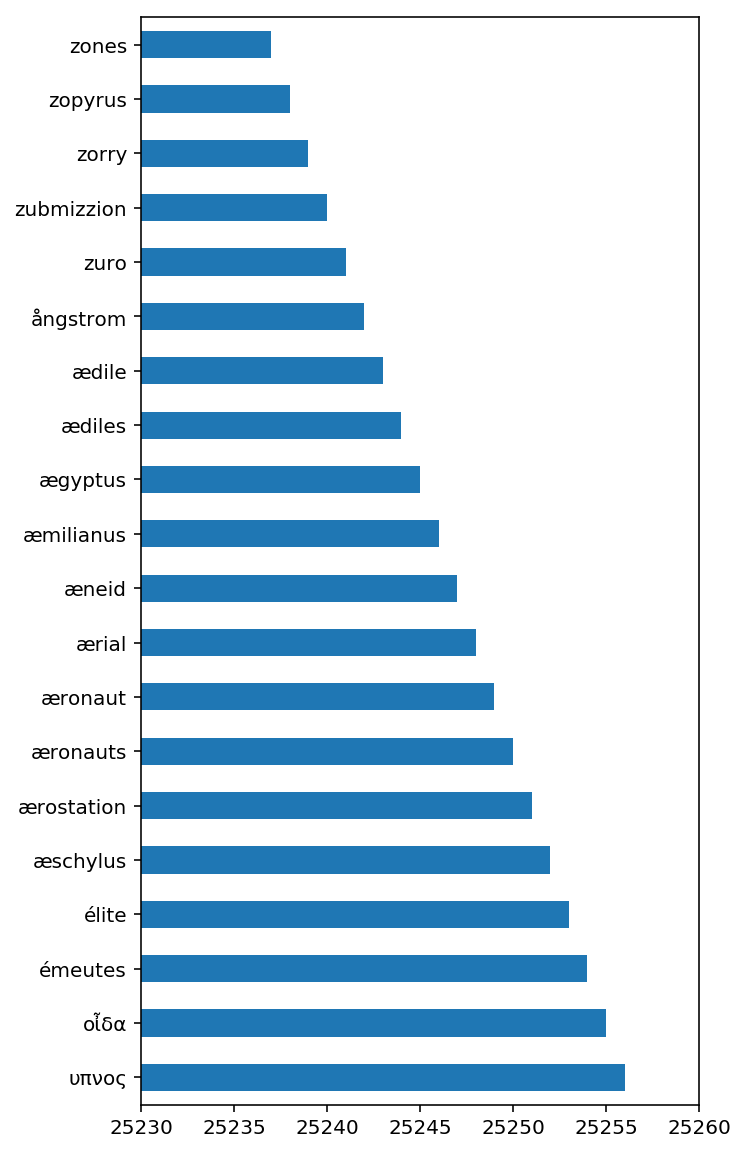

In [115]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [116]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [117]:
data['text'] = data['text'].apply(stemming)
data.head(10)

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,youth pass solitud best year spent gentl femin...,MWS
6,id09674,astronom perhap point took refug suggest non l...,EAP
7,id13515,surcingl hung riband bodi,EAP
8,id19322,knew could say stereotomi without brought thin...,EAP
9,id00912,confess neither structur languag code govern p...,MWS


In [118]:
# Top words after stemming operation
# Collect vocabulary count

# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

In [119]:
dictionary

dict_items([('process', 10263), ('howev', 6341), ('afford', 218), ('mean', 8122), ('ascertain', 770), ('dimens', 3588), ('dungeon', 4029), ('might', 8283), ('make', 7934), ('circuit', 2321), ('return', 10997), ('point', 9989), ('whenc', 14762), ('set', 11709), ('without', 14906), ('awar', 952), ('fact', 4736), ('perfect', 9667), ('uniform', 13957), ('seem', 11613), ('wall', 14612), ('never', 8797), ('occur', 9058), ('fumbl', 5368), ('mere', 8215), ('mistak', 8379), ('left', 7525), ('hand', 5930), ('gold', 5667), ('snuff', 12105), ('box', 1564), ('caper', 1933), ('hill', 6197), ('cut', 3129), ('manner', 7986), ('fantast', 4791), ('step', 12467), ('took', 13359), ('incess', 6627), ('air', 287), ('greatest', 5764), ('possibl', 10079), ('self', 11629), ('satisfact', 11406), ('love', 7792), ('spring', 12347), ('look', 7759), ('windsor', 14872), ('terrac', 13089), ('sixteen', 11962), ('fertil', 4898), ('counti', 2915), ('spread', 12342), ('beneath', 1248), ('speckl', 12270), ('happi', 5956),

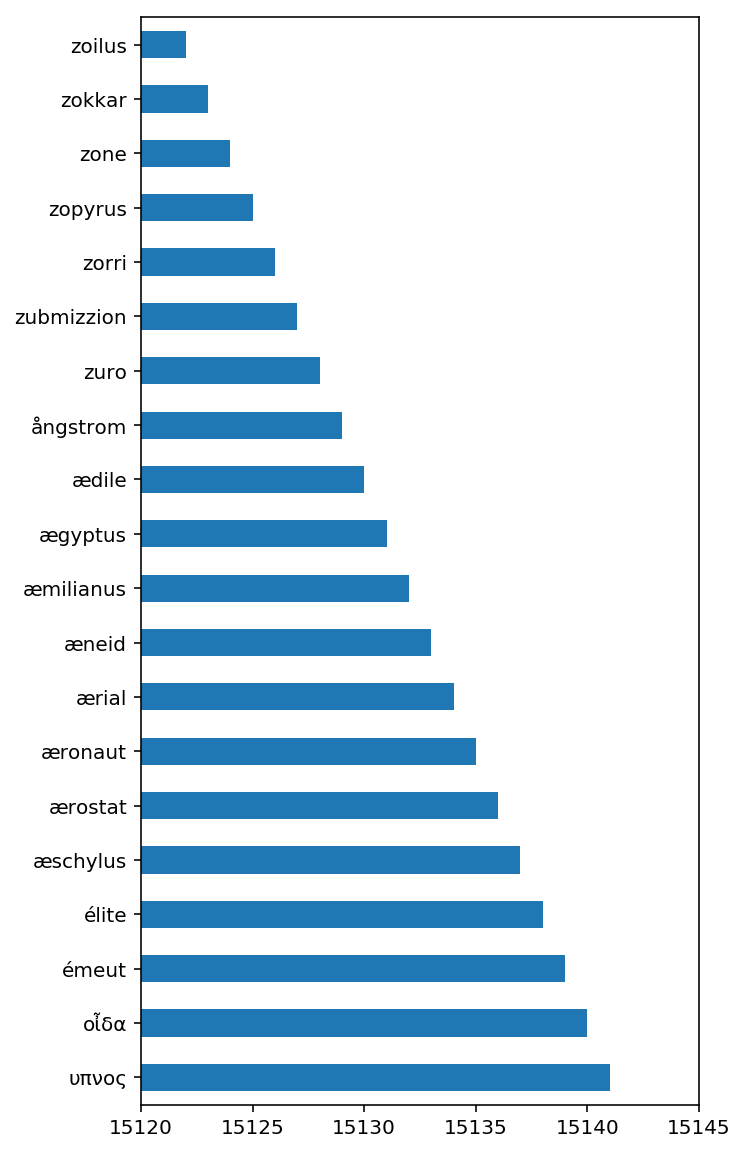

In [120]:
# Bar plot of top words after stemming

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [121]:
def length(text):    
    ''''a function which returns the length of text'''
    return len(text)

In [122]:
data['length'] = data['text'].apply(length)
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


In [123]:
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

In [124]:
EAP_data


,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
11,id16607,barricad present secur,EAP,22
14,id17189,glanc show fallaci idea,EAP,23
16,id08441,speech gave cours interpret fanci doubt event ...,EAP,168
18,id14862,even went far speak slight hectic cough one ti...,EAP,150
20,id11411,net work perman fasten hoop attach seri run lo...,EAP,53


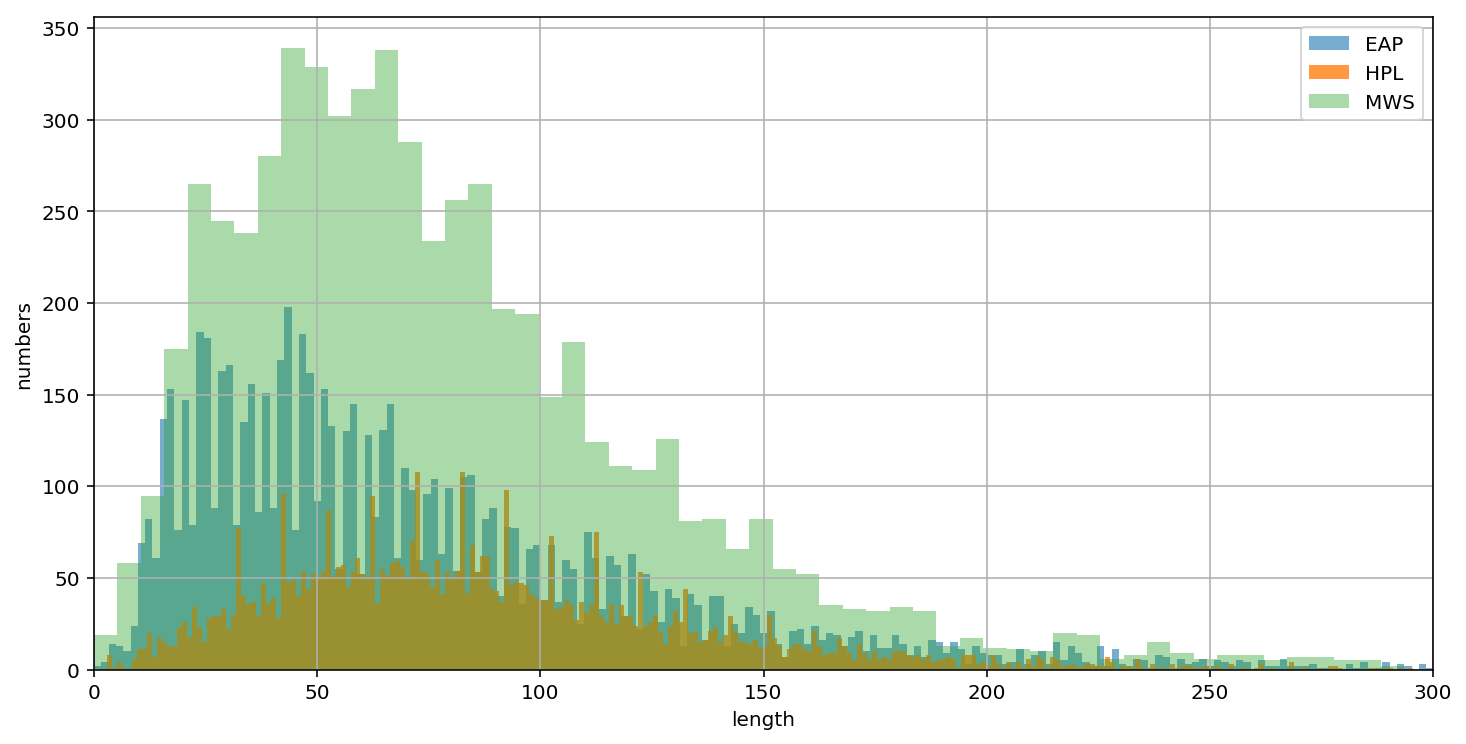

In [125]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

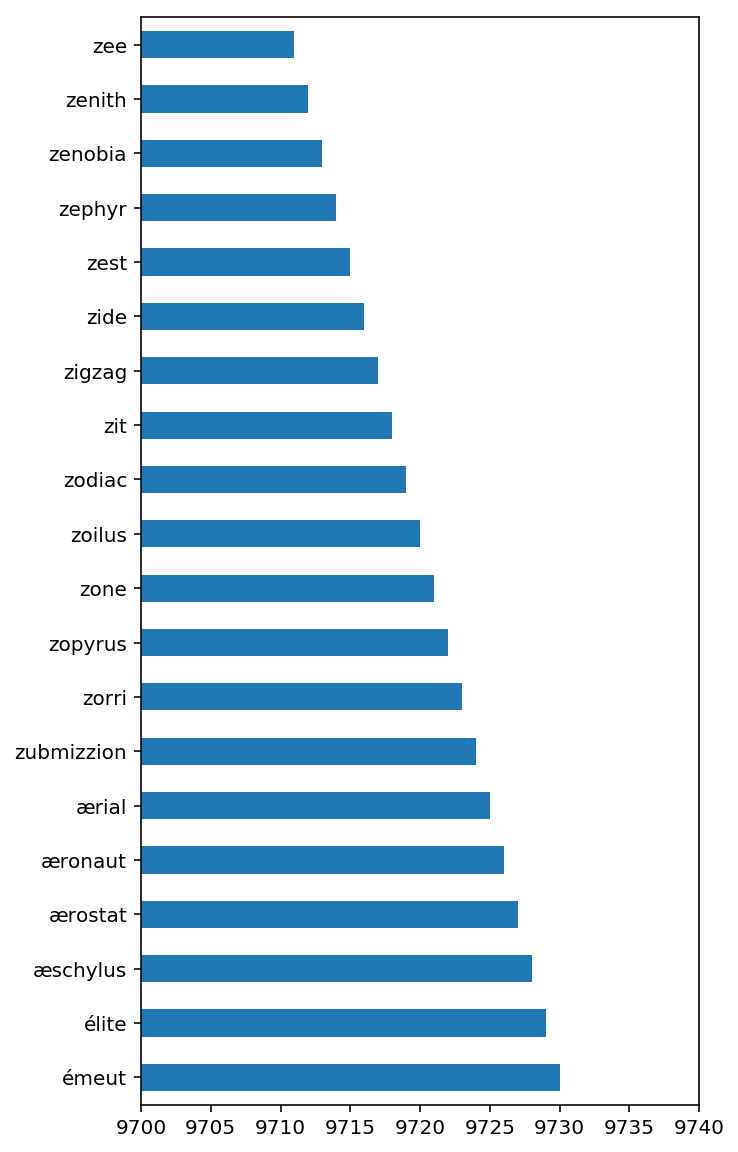

In [126]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = EAP_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))

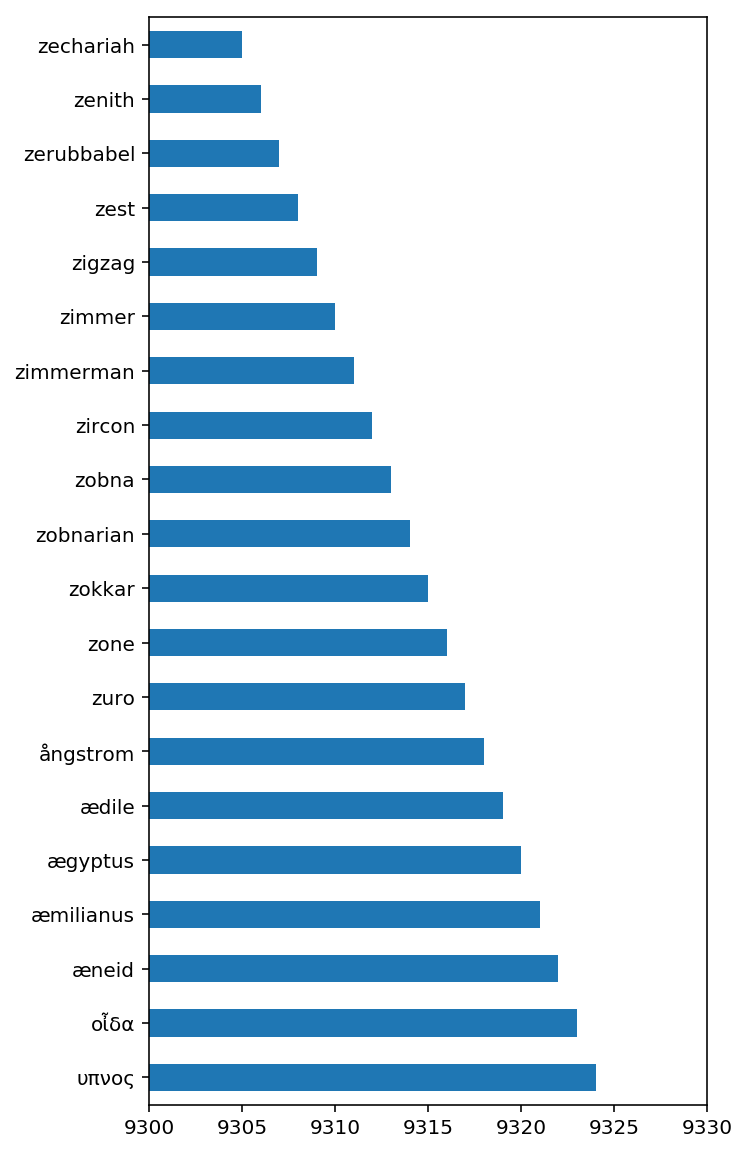

In [127]:
# Mary Shelley
# create the object of tfid vectorizer
HPL_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
HPL_tfid_vectorizer.fit(HPL_data['text'])
# collect the vocabulary items used in the vectorizer
HPL_dictionary = HPL_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in HPL_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index    
HPL_vocab = pd.Series(count, index=vocab)
# sort the dataframe
HPL_vocab = HPL_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = HPL_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (9300, 9330))

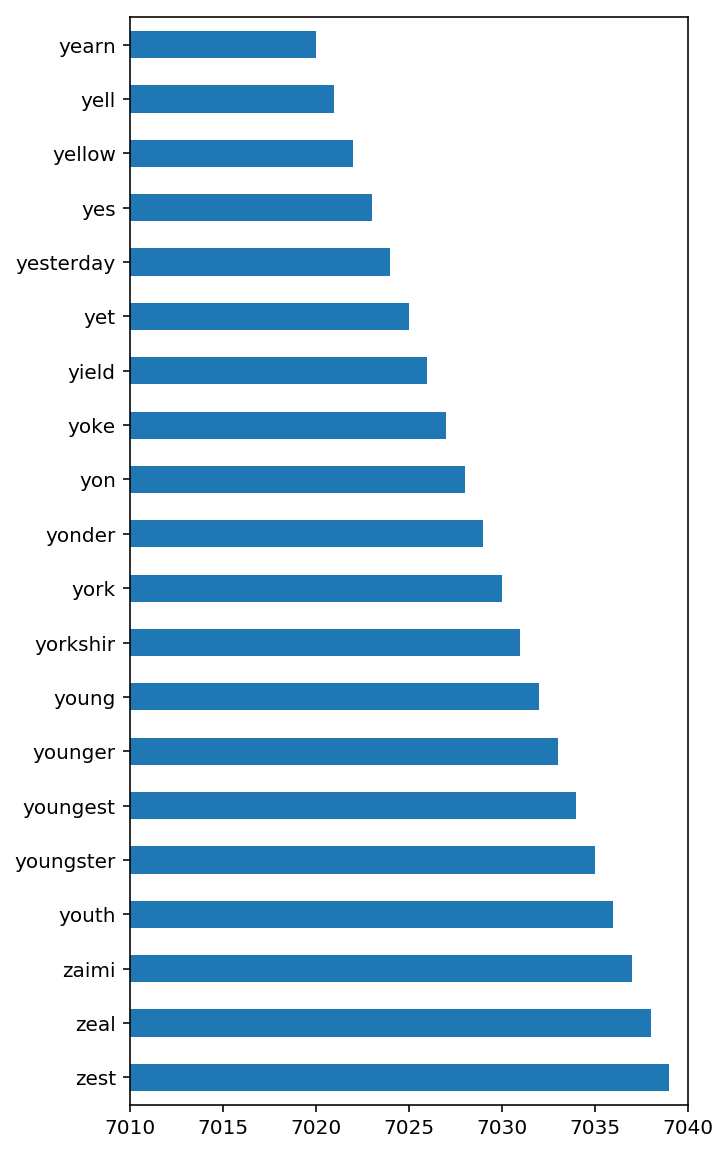

In [128]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
# collect the vocabulary items used in the vectorizer
MWS_dictionary = MWS_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in MWS_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index    
MWS_vocab = pd.Series(count, index=vocab)
# sort the dataframe
MWS_vocab = MWS_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vacab = MWS_vocab.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))

In [129]:
# TF-IDF Extraction
# tf-idf weight is product of two terms: the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [130]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [131]:
tfid_matrix

<19579x15142 sparse matrix of type '<class 'numpy.float64'>'
	with 249105 stored elements in Compressed Sparse Row format>

In [132]:
array

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

df['output'] = data['author']
df['id'] = data['id']
df.head(10)
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
          15134,    15135,    15136,    15137,    15138,    15139,    15140,
          15141, 'output',     'id'],
      dtype='object', length=15144)

In [141]:
features = df.columns.tolist()
output = 'output'
# # removing the output and the id from features
features.remove(output)
features.remove('id')

In [135]:
features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [142]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [143]:
alpha_list1 = np.linspace(0.006, 0.1, 20)
alpha_list1 = np.around(alpha_list1, decimals=4)
alpha_list1

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [145]:
# Gridsearch

# parameter grid
parameter_grid = [{"alpha":alpha_list1}]

In [146]:
# classifier object
classifier1 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch1 = GridSearchCV(classifier1,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch1.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [147]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

In [148]:
results1

,alpha,neglogloss
0,0.006,-0.450089
1,0.0109,-0.443873
2,0.0159,-0.441745
3,0.0208,-0.441224
4,0.0258,-0.441472
5,0.0307,-0.442141
6,0.0357,-0.443083
7,0.0406,-0.444167
8,0.0456,-0.445378
9,0.0505,-0.446632


In [149]:
results1 = pd.DataFrame()
# collect alpha list
results1['alpha'] = gridsearch1.cv_results_['param_alpha'].data
# collect test scores
results1['neglogloss'] = gridsearch1.cv_results_['mean_test_score'].data

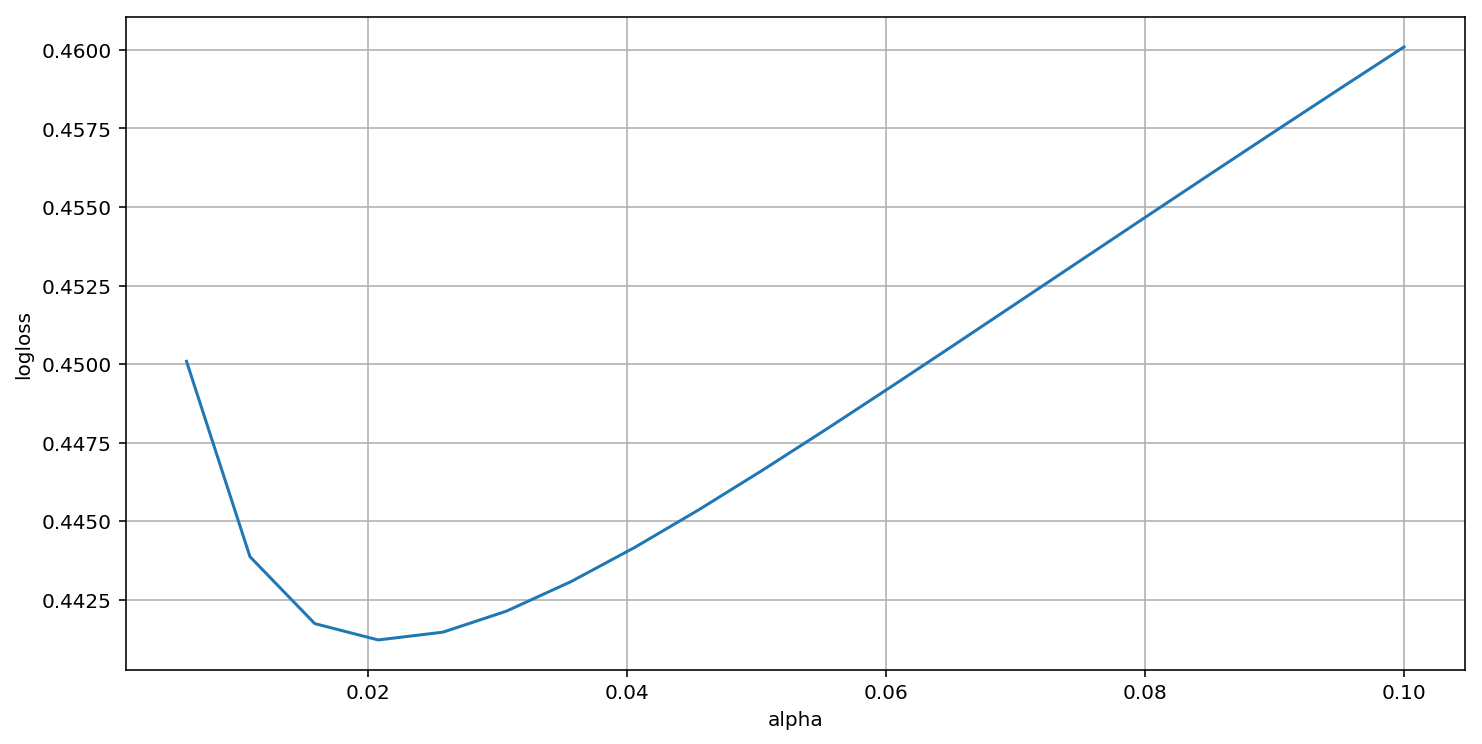

In [150]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results1['alpha'], -results1['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()

In [151]:
alpha_list2 = np.linspace(0.006, 0.1, 20)
alpha_list2 = np.around(alpha_list2, decimals=4)
alpha_list2

array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])

In [152]:
parameter_grid = [{"alpha":alpha_list2}]

In [165]:
parameter_grid
len(features)

15142

In [157]:
# classifier object
classifier2 = MultinomialNB()
# gridsearch object using 4 fold cross validation and neg_log_loss as scoring paramter
gridsearch2 = GridSearchCV(classifier2,parameter_grid, scoring = 'neg_log_loss', cv = 4)
# fit the gridsearch
gridsearch2.fit(df[features], df[output])

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': array([0.006 , 0.0109, 0.0159, 0.0208, 0.0258, 0.0307, 0.0357, 0.0406,
       0.0456, 0.0505, 0.0555, 0.0604, 0.0654, 0.0703, 0.0753, 0.0802,
       0.0852, 0.0901, 0.0951, 0.1   ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [166]:
results2 = pd.DataFrame()
# collect alpha list
results2['alpha'] = gridsearch2.cv_results_['param_alpha'].data
# collect test scores
results2['neglogloss'] = gridsearch2.cv_results_['mean_test_score'].data

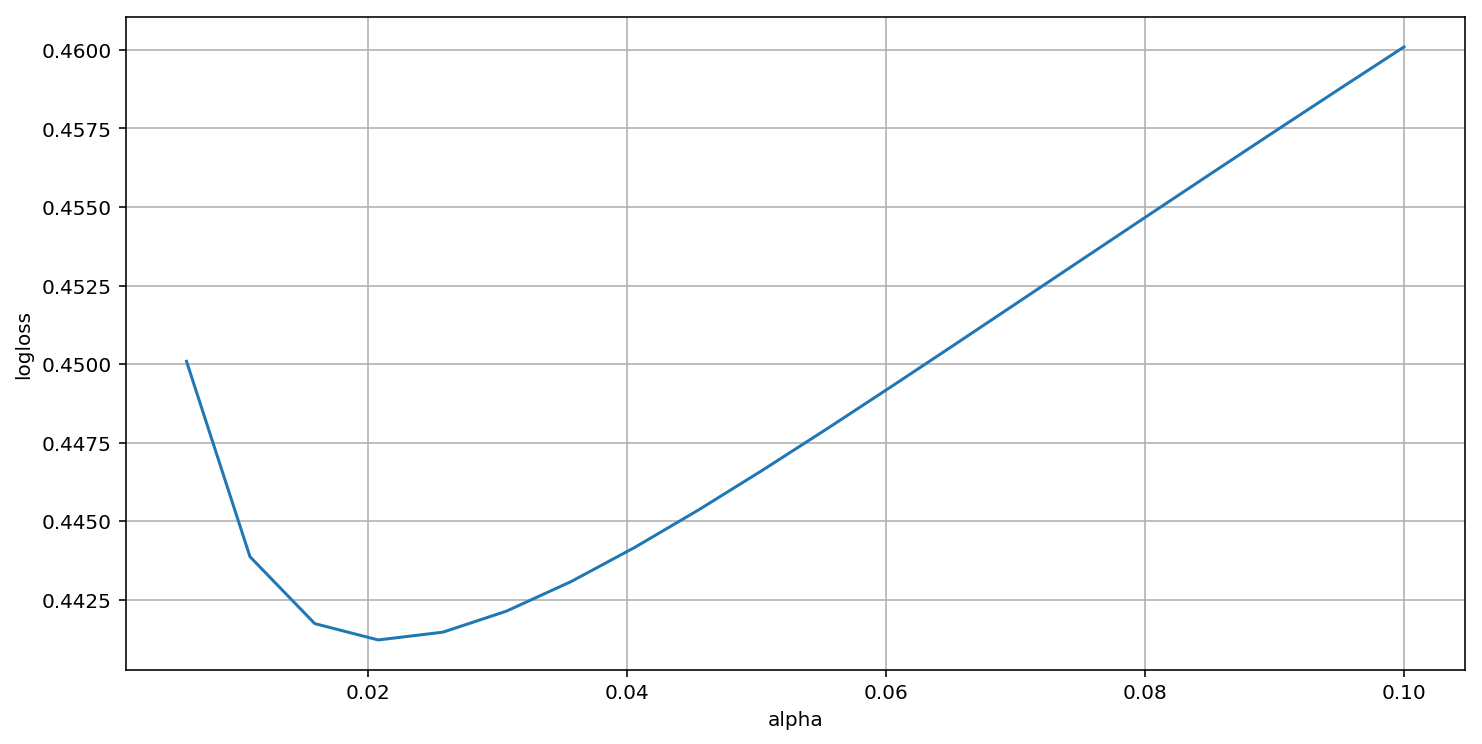

In [167]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
plt.plot(results2['alpha'], -results2['neglogloss'])
plt.xlabel('alpha')
plt.ylabel('logloss')
plt.grid()